In [1]:
# Produtos vendidos com Dorflex
#
# Analise a partir de arquivo .csv criado por Angelo
#
# Monica Barros
# 05/09/2016


In [2]:
## Importações variadas
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


# from scipy import optimize
#from scipy.optimize import curve_fit
#from scipy.optimize import leastsq
from scipy.optimize import *

In [3]:
# Identificar quais versões dos módulos principais estão sendo usadas
print "Versão Pandas          " +str(pd.__version__)
print "Versão Numpy           " + str(np.__version__)
print "Versão MatplotLib      " + str(mpl.__version__)

Versão Pandas          0.18.1
Versão Numpy           1.11.1
Versão MatplotLib      1.5.1


In [61]:
os.chdir('C:\\Users\\Monica\\Dropbox\\a2i2_flashfarma\\Scripts')

In [62]:
# Mostra o diretório atual
os.getcwd()

'C:\\Users\\Monica\\Dropbox\\a2i2_flashfarma\\Scripts'

In [67]:
### leitura dos dados - mudar o diretório quando necessário
### Lista todos os arquivos .csv do diretorio corrente

for lista_arquivo in [f for f in os.listdir(os.getcwd()) if f.endswith('.csv')]:
    print lista_arquivo

best_sellers_todas_categorias_juntas_20160715.csv
best_sellers_todas_categorias_juntas_20160718.csv
frequencias_produtos_vendidos_junto_com_Dorflex_20160715.csv
frequencias_produtos_vendidos_junto_com_Losartana_20160715.csv
frequencias_produtos_vendidos_junto_com_Neosoro_20160715.csv
paracetamol_not_unique.csv
paracetamol_unique.csv
tbl_categoria_produto.csv
tbl_curva_abc.csv
tbl_curva_abc_faturamento_loja_1.csv
tbl_curva_abc_faturamento_loja_2.csv
tbl_curva_abc_faturamento_loja_3.csv
tbl_flash_vendas_mv.csv
tbl_itemvenda.csv
tbl_mais_vendidos_com_choc_e_bala_2015.csv
tbl_principioativo.csv
tbl_produto.csv
tbl_venda.csv
tbl_vendas_paracetamol_e_acetilsalic_2014_e_2015.csv
tbl_vendidos_com_paracetamol_e_acetilsalic_2014_e_2015.csv


In [69]:
### A partir da lista acima, seleciona um arquivo

### Note que o separador é, neste caso ","
## df = pd.read_csv('C://Users//Monica//Dropbox//a2i2_flashfarma//Scripts//frequencias_produtos_vendidos_junto_com_Dorflex_20160715.csv', sep = ',')
nome_arquivo =raw_input("Nome do arquivo (sem .csv)   ")

Nome do arquivo (sem .csv)   frequencias_produtos_vendidos_junto_com_Losartana_20160715


In [70]:
nome_arquivo_csv = nome_arquivo+str(".csv")
print nome_arquivo_csv

frequencias_produtos_vendidos_junto_com_Losartana_20160715.csv


In [74]:
#Leitura do dataframe a partir do arquivo selecionado
df = pd.read_csv(os.getcwd()+str('\\')+nome_arquivo_csv, sep = ',')

In [75]:
(rows, cols) = df.shape
(rows, cols)

(243, 5)

In [76]:
df.head()

,idProduto,nome,fabricante,categoria,frequencia
0,7898148301720,LOSARTANA POTASSICA 50mg cx 30 comp rev,"PRATI, DONADUZZI",8,1816
1,7896112165651,HIDROCLOROTIAZIDA 25mg cx 30 comp,TEUTO,8,461
2,7897595602572,ATENOLOL 25mg cx 30 comp rev,SANDOZ,8,447
3,7896523215235,FP SINVASTATINA 20MG 30CPR CIMED,CIMED,6,201
4,7891721027468,GLIFAGE XR 500mg cx 30 comp,MERCK,6,152


In [77]:
df.tail()

,idProduto,nome,fabricante,categoria,frequencia
238,7891721020193,LEVOTIROXINA SODICA 175mcg cx 30 comp,MERCK,8,1
239,340525,ESM KI COR (DIVERSOS),KI COR,3,1
240,7891024114773,SAB PROTEX 90G ERVA DOCE,COLGATE,3,1
241,7891035912818,DEPIL VEET FOLHAS FACIAL PELE DELIC 12UN,RECKITT HIGIENE BEL,3,1
242,7891150041646,COND TRESEMME DETOX CAPILAR 400ML,UNILEVER,18,1


In [8]:
# Identifica um produto na dataframe  por seu codigo de barras
# df.loc[df['idProduto'] == 340525]

In [84]:
# grouped = df.groupby('idProduto').count().reset_index() 

In [80]:
# Cria nova data frame, de produtos agregados por frequencia, em ordem descrescente - note o reset index para que a 1a coluna contenha os nomes
# grouped=df.groupby(["nome", "idProduto"]).agg({"idNotaVenda": pd.Series.nunique}).sort_values('idNotaVenda', ascending=False).reset_index() 

# No caso dos produtos vendidos com Losartana, já estão agrupados
# E mostrados em ordem decrescente de frequencias


In [85]:
#grouped.shape

(243, 5)

In [82]:
#type(grouped)

pandas.core.frame.DataFrame

In [89]:
#grouped.head(10)

In [90]:
tt=df.sort_values('frequencia', ascending = False)

In [91]:
tt.head()

,idProduto,nome,fabricante,categoria,frequencia
0,7898148301720,LOSARTANA POTASSICA 50mg cx 30 comp rev,"PRATI, DONADUZZI",8,1816
1,7896112165651,HIDROCLOROTIAZIDA 25mg cx 30 comp,TEUTO,8,461
2,7897595602572,ATENOLOL 25mg cx 30 comp rev,SANDOZ,8,447
3,7896523215235,FP SINVASTATINA 20MG 30CPR CIMED,CIMED,6,201
4,7891721027468,GLIFAGE XR 500mg cx 30 comp,MERCK,6,152


In [120]:
# Produtos ordenados e de alta frequencia (>50)
tt[tt['frequencia']>50]

,idProduto,nome,fabricante,categoria,frequencia
0,7898148301720,LOSARTANA POTASSICA 50mg cx 30 comp rev,"PRATI, DONADUZZI",8,1816
1,7896112165651,HIDROCLOROTIAZIDA 25mg cx 30 comp,TEUTO,8,461
2,7897595602572,ATENOLOL 25mg cx 30 comp rev,SANDOZ,8,447
3,7896523215235,FP SINVASTATINA 20MG 30CPR CIMED,CIMED,6,201
4,7891721027468,GLIFAGE XR 500mg cx 30 comp,MERCK,6,152
5,7898148291298,CLORIDRATO DE METFORMINA 850mg cx 30 comp rev,"PRATI, DONADUZZI",8,142
6,7896523210070,HIDROCLOROTIAZIDA 25mg cx 3bl x 10 comp,CIMED,8,142
7,7898148297269,GLIBENCLAMIDA 5mg cx 30 comp,"PRATI, DONADUZZI",8,63


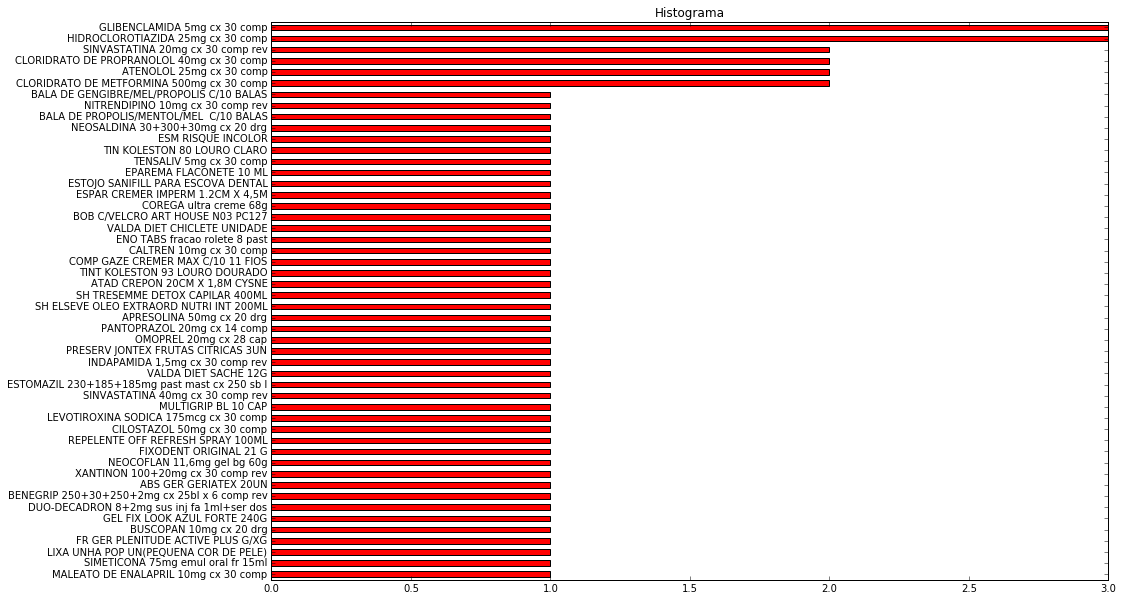

In [101]:
# Histograma dos 50 primeiros produtos 
# COMPARE COM LIGEIRAMENTE DIFERENTE NA CELULA ABAIXO


## ???? veja a escala - numero de ocorrencias daquele nome??

fig, ax = plt.subplots()
df['nome'].value_counts()[:50].plot(kind='barh', ax=ax, title = 'Histograma', figsize = (15,10), color = 'red', sort_columns = True)
# Eixo invertido - maior frequencia primeiro
ax.invert_yaxis()
# ax.legend(df['nome'][:50])

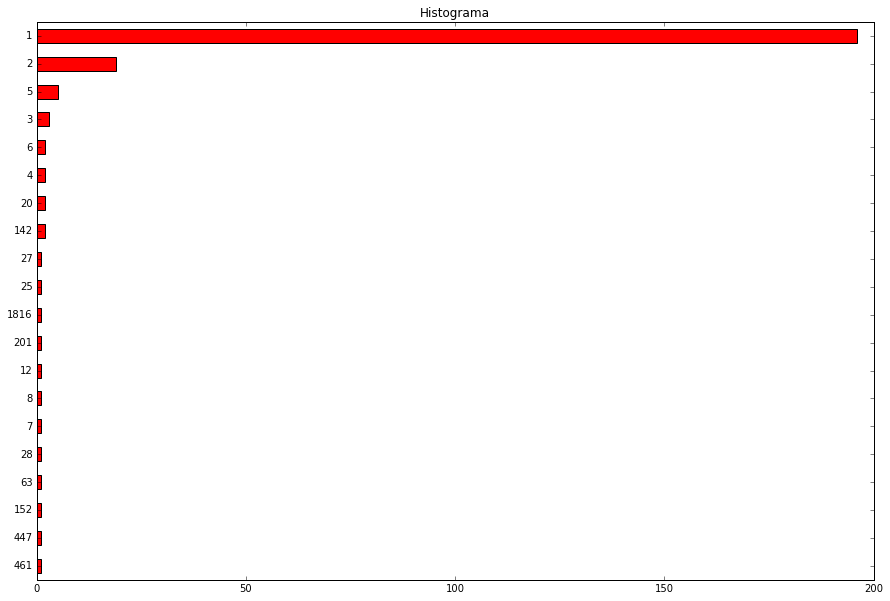

In [102]:
# COMO COLOCAR O NOME DO PRODUTO NO EIXO?
fig, ax = plt.subplots()
df['frequencia'].value_counts()[:50].plot(kind='barh', ax=ax, title = 'Histograma', figsize = (15,10), color = 'red', sort_columns = True)
# Eixo invertido - maior frequencia primeiro
ax.invert_yaxis()
# ax.legend(df['nome'][:50])

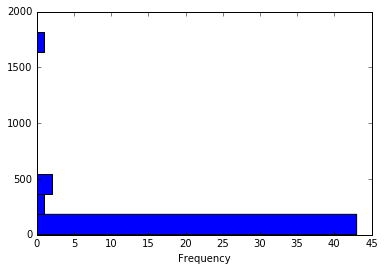

In [117]:
plt.figure()
#fig, ax = plt.subplots()
df['frequencia'][df['frequencia']>1].plot.hist(by=df['nome'], orientation = 'horizontal')

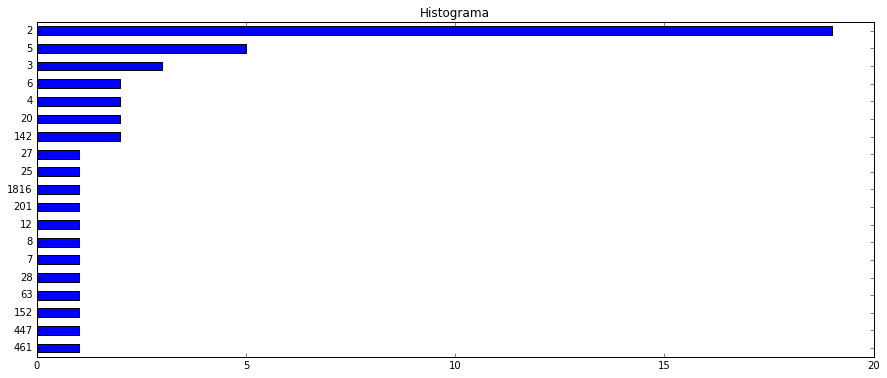

In [94]:
#  NOTE QUE ESTE GRAFICO NAO MOSTRA A MESMA COISA QUE O ACIMA
# POR EXEMPLO, MOSTRA QUE QUASE 180 PRODUTOS APARECEM 2 VEZES (EM 2 idNotaVenda), QUASE 70 APARECEM 3 VEZES, ..., E UM PRODUTO OCORRE 1950 VEZES 
fig, ax = plt.subplots()
grouped['idNotaVenda'].value_counts()[1:50].plot(kind='barh', ax=ax, title = 'Histograma', figsize = (15,6))
ax.invert_yaxis()
#ax.legend(grouped["nome"][1:50]);

In [16]:
# Número de nomes únicos (não concorda com a saída do groupby!!, onde grouped tinha 1123 linhas)
# ==============================================================================================
print("Número de produtos únicos (pelo nome):   " +str(df.loc[:, 'nome'].nunique()))

Número de produtos únicos (pelo nome):   1119


In [17]:
# Estatísticas básicas
df.loc[:, 'nome'].describe()

count                4329
unique               1119
top       DORFLEX 10 COMP
freq                 1950
Name: nome, dtype: object

In [18]:
# Mostra tudo o que se pode fazer com "grouped"
dir(grouped)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',


In [28]:
os.listdir(".")

['.ipynb_checkpoints',
 'BeautifulSoup.py',
 'BeautifulSoup.pyc',
 'cod_barras_fraldas_huggies.csv',
 'cod_barras_shampoos.xlsx',
 'cod_barras_shampoos_20160621.csv',
 'cod_barras_shampoos_20160623.csv',
 'cod_barras_shampoos_20160628.csv',
 'cod_barras_shampoos_20160629.csv',
 'cod_barras_shampoos_20160630.csv',
 'cod_barras_shampoos_20160705.csv',
 'cod_barras_shampoos_20160706.csv',
 'cod_barras_shampoos_20160711.csv',
 'cod_barras_shampoos_20160712.csv',
 'cod_barras_shampoos_20160713.csv',
 'Descriptive Stats 20150213.ipynb',
 'download_image.ipynb',
 'EWMA.ipynb',
 'EWMA.py',
 'EWMA_fat_in.csv',
 'EWMA_out.csv',
 'EWMA_previsao_20160905.csv',
 'forecasting_model_20160118.ipynb',
 'forecasting_model_R_20160118.ipynb',
 'holt-winters-python.zip',
 'holt-winters2.py',
 'import.io_cod_barras_shampoos_20160726.csv',
 'import.io_cod_barras_shampoos_20160726.json',
 'import.io_drogaria_pacheco_20160727.csv',
 'import.io_drogaria_pacheco_20160727.json',
 'import.io_drogaria_venancio_reme